<table><tr>
<td> <img src="https://cdn.vox-cdn.com/thumbor/x_xwv-YOmwjwOV_dHNi_2hKJQlg=/0x6:2682x1794/1200x800/filters:focal(0x6:2682x1794)/cdn.vox-cdn.com/uploads/chorus_image/image/45568660/usa-today-7021648.0.jpg" alt="Super Bowl" style="width: 400px;"/> </td>
<td> <img src="https://pbs.twimg.com/media/Bzw88xUCcAAukOR.jpg" alt="Flaccometer" style="width: 450px;"/> </td>
</tr></table>

# <center><font size="6">Is Joe Flacco an Elite Quarterback?</font></center>

#### <center>By Andrew Stehman</center>
***
# <center> Introduction </center>

<font size="3.5">In 2008, the Baltimore Raven's drafted Quarterback Joe Flacco out of the University of Delaware with the 18th overall draft pick. In his early career, Joe Flacco saw substantial success, making a run in the playoffs to the AFC Championship Game (the game before the Super Bowl) his rookie year. In the following four years, Joe Flacco and the Baltimore Ravens made the playoffs each year, making two more AFC Championship Game appearances, and winning Super Bowl XLVII in the 2012 season. He was nicknamed by Raven's fans as "January Joe" for his playoff performances. After an impressive start to his career, Joe Flacco signed the largest contract of any professional NFL player at the time. So, naturally, the question began to be asked around the NFL: "Is Joe Flacco an Elite Quarterback?", so, here I am to shed some light on the subject by looking at quarterback statistics around the league during the first six years of Joe Flacco's career, 2008 through 2013.</font>

# Data Scraping
<font size="3.5">To start, will we import the libraries we will need for gathering the data from sources on the internet, as well as storing and plotting the data. All libraries used are imported here.</font>

In [743]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from bs4 import BeautifulSoup
import requests
import warnings
import sklearn
from sklearn.linear_model import LinearRegression
!pip3 install lxml

warnings.filterwarnings('ignore')

### Source
<div><font size="3.5">The website we will be gathering information from is <a href="url" target="https://www.pro-football-reference.com/">pro-football-reference.com</a>. Their site has an abundance of information, ranging from yearly statistics, which we will be using, to pages about individual players and their respective performances. Each webpage must be scraped individually, so we will need to create a loop to visit each page. The url for their website is not encrypted, so we can easily change the year of the page that we would like to visit.</font></div>
<br>
<div><font size="3.5"> <a href="url" target="https://www.pro-football-reference.com/years/2008/passing.htm">The page we will start scraping from</a> is similar to the other pages we will be using to extract our information. The table on the site contains a lot of information, some of which we do not need. We will start by taking in all the data in the table, then later condensing it down to what we want. The tables we have scraped will be stored in an array to be combined after they have all been processed. Take note that a column has been added to indicate the year the stats came from. This will help us later to analyze our data.</font></div>

In [744]:
url = "https://www.pro-football-reference.com/years/2008/passing.htm"
dfs = []

for i in range(2008, 2014):
    # gets page from server and finds the table with the player
    # stats in it.
    re = requests.get(url)
    root = BeautifulSoup(re.content)
    t = root.find("table")
    
    # converts the tables to a dataframe
    df = pd.read_html(str(t))[0]
   
    # this makes a new column that indicates the year each player's stats are from
    df["year"] = [i for k in range(0, df["GS"].count())]
    
    # add the current dataframe to the list of dataframes already scraped
    dfs.append(df)
    
    # change 2008 to 2009 in the url, 2009 to 2010, etc. up through 2013 (2014 is non inclusive)
    url = url.replace(str(i), str(i+1))

# Data Tidying
<font size="3.5">Now that all the data has been scraped into tables, we can remove unwanted rows of information. First, we start by removing of rows of information that is unrelated to any player. We will also remove any players who do not have any wins or losses associate with them. On occasion, teams will run trick plays where someone other than the quarterback throws the ball. They will be taken out by this. <br><br>Additionally, we would like to make sure the player we are looking at is not a backup quarterback playing for only a few games. Their stats may be skewed for better or for worse, and would be unreliable data points. Any player who did not start atleast half the season will be removed.</font>

In [745]:
starters = []
for i in range(0, len(dfs)):
    df = dfs[i]
    # rows exist that are just repeats of the column titles. This removes them.
    df = df[~df["Rk"].str.contains("Rk")]
    
    # converts the column "QBrec" to string and removes invalid entries
    df["QBrec"] = df["QBrec"].astype(str)
    df = df[~df["QBrec"].str.contains("NaN")]
    df = df[~df["QBrec"].str.contains("nan")]

    # convert the Games Started column to numbers
    df["GS"] = pd.to_numeric(df["GS"])
    # filter out quarterbacks who did not start atleast half the season
    df = df[df["GS"] > 7]
    starters.append(df)

<font size="3.5">Now that we have all the tables, we can combine them into one large table. </font>

In [746]:
#combine the tables from each year
table = starters[0]
for i in range(1, len(starters)):
    table = table.append(starters[i], ignore_index=True)

table

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Rate,QBR,Sk,Yds.1,NY/A,ANY/A,Sk%,4QC,GWD,year
0,1,Drew Brees*,NOR,29,QB,16,16,8-8-0,413,635,...,96.2,65.9,13,92,7.68,7.55,2.0,2,2,2008
1,2,Jay Cutler *,DEN,25,QB,16,16,8-8-0,384,616,...,86.0,65.7,11,69,7.11,6.61,1.8,3,4,2008
2,3,Kurt Warner*,ARI,37,QB,16,16,9-7-0,401,598,...,96.9,69.8,26,182,7.05,7.00,4.2,1,1,2008
3,4,Donovan McNabb,PHI,32,QB,16,16,9-6-1,345,571,...,86.4,52.9,23,149,6.34,6.28,3.9,2,1,2008
4,5,Peyton Manning *+,IND,32,QB,16,16,12-4-0,371,555,...,95.0,78.3,14,86,6.88,6.88,2.5,4,6,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,29,Aaron Rodgers,GNB,30,QB,9,9,6-3-0,193,290,...,104.9,60.6,21,117,7.78,8.00,6.8,1,1,2013
190,30,Terrelle Pryor,OAK,24,QB,11,9,3-6-0,156,272,...,69.1,57.1,31,203,5.26,4.09,10.2,NaN,NaN,2013
191,34,Case Keenum,HOU,25,qb,8,8,0-8-0,137,253,...,78.2,48.3,19,201,5.73,5.40,7.0,NaN,NaN,2013
192,35,Kellen Clemens,STL,30,QB,10,9,4-5-0,142,242,...,78.8,39.4,21,138,5.84,5.25,8.0,NaN,NaN,2013


<font size="3.5">Now we can drop the columns that we do not wish to look at. Other stats can be kept if you would like to analyze them, however, these variables are what we will be focusing on.</font>

In [747]:
table = table[["Player", "QBrec", "Cmp%", "TD", "Int", "ANY/A", "Rate", "Sk", "year"]]
table

,Player,QBrec,Cmp%,TD,Int,ANY/A,Rate,Sk,year
0,Drew Brees*,8-8-0,65.0,34,17,7.55,96.2,13,2008
1,Jay Cutler *,8-8-0,62.3,25,18,6.61,86.0,11,2008
2,Kurt Warner*,9-7-0,67.1,30,14,7.00,96.9,26,2008
3,Donovan McNabb,9-6-1,60.4,23,11,6.28,86.4,23,2008
4,Peyton Manning *+,12-4-0,66.8,27,12,6.88,95.0,14,2008
...,...,...,...,...,...,...,...,...,...
189,Aaron Rodgers,6-3-0,66.6,17,6,8.00,104.9,21,2013
190,Terrelle Pryor,3-6-0,57.4,7,11,4.09,69.1,31,2013
191,Case Keenum,0-8-0,54.2,9,6,5.40,78.2,19,2013
192,Kellen Clemens,4-5-0,58.7,8,7,5.25,78.8,21,2013


<font size="3.5">Tidying the data is almost complete. Since some quarterbacks have played different numbers of games from each other, let us convert the statistics to show the performance per game. Additionally, we will be taking their record as starting quarterback and turning it into a win rate column.</font>

In [748]:
winrate = []
names = []
completion = []
sacks = []
tds = []
ints = []
ratio = []
for x in table.itertuples():
    
    # calculate winrate from the QBrec column
    record = x[2].split("-")
    games = int(record[0])+ int(record[1])+ int(record[2])
    winrate.append(int(record[0])/games)
    
    # the original table uses * and + to indicate Pro Bowl and All-Pro selections
    names.append(x[1].replace("*", "").replace("+", "").strip())
    
    # completion rate is currently a number above one as a percentage. convert to only decimals.
    completion.append(float(x[3])/100)
    
    # convert the stats to occurences per game
    sacks.append(int(x[8])/games)
    tds.append(int(x[4])/games)
    ints.append(int(x[5])/games)
    ratio.append(int(x[4])/int(x[5]))
    

table["Player"] = names
table["win_rate"] = winrate
table["Cmp%"] = completion
table["Sk"] = sacks
table["TD"] = tds
table["Int"] = ints
table["td_int_ratio"] = ratio
table = table.drop("QBrec", axis=1)

table["ANY/A"] = table["ANY/A"].astype(float)
table["Rate"] = table["Rate"].astype(float)

table

,Player,Cmp%,TD,Int,ANY/A,Rate,Sk,year,win_rate,td_int_ratio
0,Drew Brees,0.650,2.125000,1.062500,7.55,96.2,0.812500,2008,0.500000,2.000000
1,Jay Cutler,0.623,1.562500,1.125000,6.61,86.0,0.687500,2008,0.500000,1.388889
2,Kurt Warner,0.671,1.875000,0.875000,7.00,96.9,1.625000,2008,0.562500,2.142857
3,Donovan McNabb,0.604,1.437500,0.687500,6.28,86.4,1.437500,2008,0.562500,2.090909
4,Peyton Manning,0.668,1.687500,0.750000,6.88,95.0,0.875000,2008,0.750000,2.250000
...,...,...,...,...,...,...,...,...,...,...
189,Aaron Rodgers,0.666,1.888889,0.666667,8.00,104.9,2.333333,2013,0.666667,2.833333
190,Terrelle Pryor,0.574,0.777778,1.222222,4.09,69.1,3.444444,2013,0.333333,0.636364
191,Case Keenum,0.542,1.125000,0.750000,5.40,78.2,2.375000,2013,0.000000,1.500000
192,Kellen Clemens,0.587,0.888889,0.777778,5.25,78.8,2.333333,2013,0.444444,1.142857


<font size="3.5">Update the column labels to reflect the change to statistic per game. Rate is more accurately re-named QBR.</font>

In [749]:
table = table.rename(columns = {"Rate": "QBR", "Cmp%": "completion_rate", "Player": "name", \
                                "Sk": "sack_rate", "TD": "td_rate", "Int": "int_rate"})

# move the "year" column to the end, as it makes more sense to be there.
table = table[[col for col in table if col not in ["year"]] + ["year"]]
table

,name,completion_rate,td_rate,int_rate,ANY/A,QBR,sack_rate,win_rate,td_int_ratio,year
0,Drew Brees,0.650,2.125000,1.062500,7.55,96.2,0.812500,0.500000,2.000000,2008
1,Jay Cutler,0.623,1.562500,1.125000,6.61,86.0,0.687500,0.500000,1.388889,2008
2,Kurt Warner,0.671,1.875000,0.875000,7.00,96.9,1.625000,0.562500,2.142857,2008
3,Donovan McNabb,0.604,1.437500,0.687500,6.28,86.4,1.437500,0.562500,2.090909,2008
4,Peyton Manning,0.668,1.687500,0.750000,6.88,95.0,0.875000,0.750000,2.250000,2008
...,...,...,...,...,...,...,...,...,...,...
189,Aaron Rodgers,0.666,1.888889,0.666667,8.00,104.9,2.333333,0.666667,2.833333,2013
190,Terrelle Pryor,0.574,0.777778,1.222222,4.09,69.1,3.444444,0.333333,0.636364,2013
191,Case Keenum,0.542,1.125000,0.750000,5.40,78.2,2.375000,0.000000,1.500000,2013
192,Kellen Clemens,0.587,0.888889,0.777778,5.25,78.8,2.333333,0.444444,1.142857,2013


<font size="3.5">Now, our table is in a tidy form. Here are what all of the columns represent: </font>
1. <font size="3.5"><div><b>name</b>: The quarterback's name</div></font>
2. <font size="3.5"><div><b>completion_rate</b>: The percentage of passes a quarterback completes out of his total passes. </div></font>
3. <font size="3.5"><div><b>td_rate</b>: Touchdowns thrown per game. </div></font>
4. <font size="3.5"><div><b>int_rate</b>: Interceptions thrown per game. </div></font>
5. <font size="3.5"><div><b>ANY/A</b>: More information <a href="url" target="https://www.pro-football-reference.com/about/glossary.htm#ay/a">here</a>. Acronym for "Adjusted Net Yards per Attempt" This stat introduces a rating to reward quarterbacks who throw more touchdowns, and penalizes quarterbacks who throw lots of interceptions or who get sacked too often. Also considers total pass yards.</div></font>
6. <font size="3.5"><div><b>QBR</b>: More information <a href="url" target="https://en.wikipedia.org/wiki/Passer_rating">here</a>. This statistic has been a formula used by the NFL for a long time to calculate a Quarterback Rating to assess how well a quarterback is playing.  </div></font>
7. <font size="3.5"><div><b>sack_rate</b>: Number of times a quarterback is sacked per game. </div></font>
7. <font size="3.5"><div><b>win_rate</b>: Number of wins divided by games played. </div></font>
7. <font size="3.5"><div><b>td_int_ratio</b>: Number of touchdowns thrown per interception thrown. </div></font>
7. <font size="3.5"><div><b>year</b>: Year that the information was taken from. </div></font>

# Data Vizualization and Analysis
 
<font size="3.5">Now, we have our data in a neat and digestable form. Let us make some different charts to see if we can find any evidence or trend that would indicate that Joe Flacco is elite.
<br>
<br>
First, we will start by showing completion percentage versus win rate for the data. 
</font>

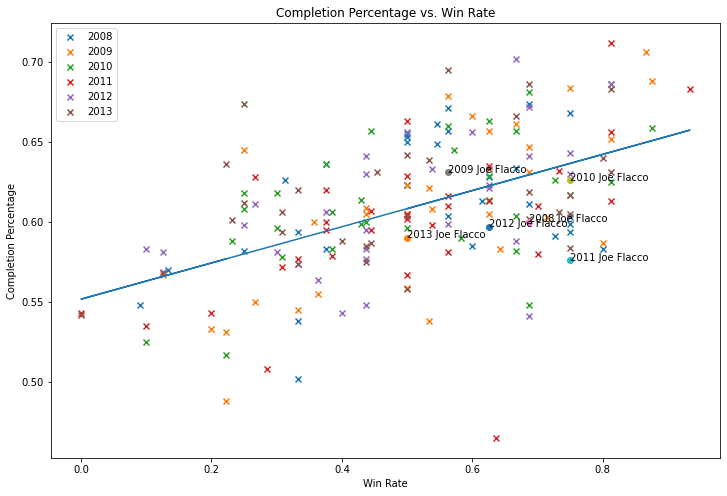

In [750]:
plt.subplots(figsize = (12,8))

i = 2008
# plot the information so each year is in one color
for y in table["year"].unique():
    year = table[(table==y).any(axis=1)]
    # remove Joe Flacco from the plot
    year = year[~year["name"].str.contains("Flacco")]
    
    # plot that specific year of data
    plt.scatter(marker = "x", x = year["win_rate"], y = year["completion_rate"], label=str(i))
    i += 1

plt.legend()

for x in table.itertuples():
    name = x[1]
    completion_rate = x[2]
    win_rate = x[8]
    if(name == "Joe Flacco"):
        plt.scatter(marker="o",x= x[8], y= x[2])
        plt.annotate(str(x[10]) + " " + x[1], (x[8], x[2]))

win_rate = np.array(table["win_rate"]).reshape(-1, 1)
comp_rate = np.array(table["completion_rate"]).reshape(-1, 1)

# make and plot regression line. 
reg = LinearRegression().fit(win_rate, comp_rate)
plt.plot(win_rate, reg.intercept_ + reg.coef_ * win_rate, '-')


x = "Win Rate"
y = "Completion Percentage"
plt.xlabel(x)
plt.ylabel(y)
plt.title(y + " vs. " + x)
plt.show()

<font size="3.5">So far, things don't look too great for Joe Flacco based on his passing accuracy. Let's see if he can do better with taking care of the ball. We can plot the touchdown to interception ratio to see if he is a good decision maker. There are only a couple outliers on the chart that make the chart small and unreadable, so we will only look at seasons where a QB has had less than 8 touchdowns thrown per interception, which is still an astounding accomplishment. We will be able to get a better idea with this range.  </font>

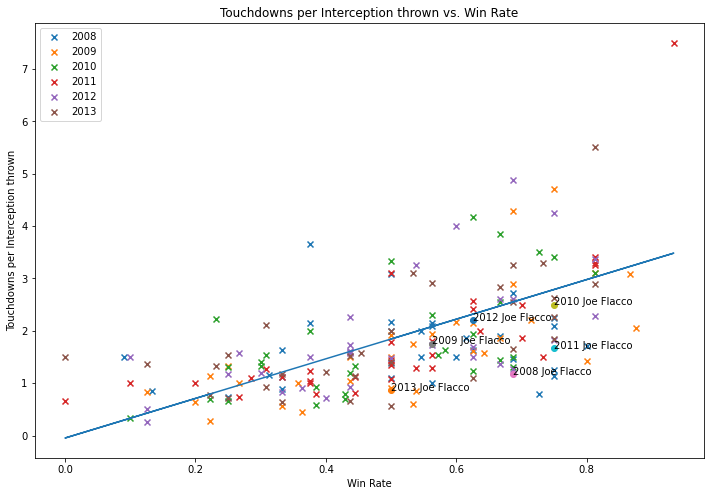

In [751]:
plt.subplots(figsize = (12,8))

col = "td_int_ratio"

i = 2008
# plot the information so each year is in one color
for y in table["year"].unique():
    year = table[(table==y).any(axis=1)]
    # remove Joe Flacco from the plot
    year = year[~year["name"].str.contains("Flacco")]
    
    #removing outliers with high td to int ratio for visibility
    year = year[year[col] < 8]
    
    # plot that specific year of data
    plt.scatter(marker = "x", x = year["win_rate"], y = year[col], label=str(i))
    i += 1

plt.legend()

for x in table.itertuples():
    name = x[1]
    completion_rate = x[2]
    win_rate = x[8]
    if(name == "Joe Flacco"):
        plt.scatter(marker="o",x= x[8], y= x[9])
        plt.annotate(str(x[10]) + " " + x[1], (x[8], x[9]))

win_rate = np.array(table["win_rate"]).reshape(-1, 1)
comp_rate = np.array(table[col]).reshape(-1, 1)

# make and plot regression line. 
reg = LinearRegression().fit(win_rate, comp_rate)
plt.plot(win_rate, reg.intercept_ + reg.coef_ * win_rate, '-')


x = "Win Rate"
y = "Touchdowns per Interception thrown"
plt.xlabel(x)
plt.ylabel(y)
plt.title(y + " vs. " + x)
plt.show()

<font size="3.5">After showing his Touchdown to Interception ratio, things are not great, but slightly better. As described at the end of the `Data Tidying` section, Quarterback rating and Adjusted Net Yards per Attempt are a way to get a better overall idea of how a quarterback performs. We can now plot those to see if Joe Flacco stands out overall from any of the other quarterbacks.</font>

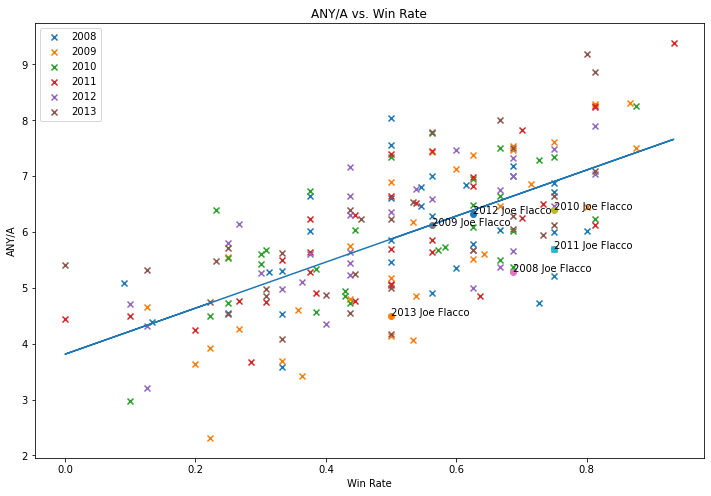

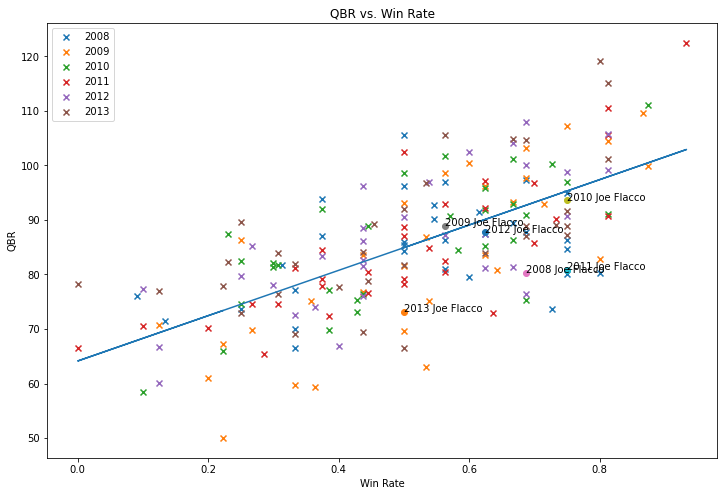

In [752]:
lst = [("ANY/A", 5), ("QBR", 6)]

for p in lst:
    plt.subplots(figsize = (12,8))
    col = p[0]
    pos = p[1]
    i = 2008
    # plot the information so each year is in one color
    for y in table["year"].unique():
        year = table[(table==y).any(axis=1)]
        # remove Joe Flacco from the plot
        year = year[~year["name"].str.contains("Flacco")]

        # plot that specific year of data
        plt.scatter(marker = "x", x = year["win_rate"], y = year[col], label=str(i))
        i += 1

    plt.legend()

    for x in table.itertuples():
        name = x[1]
        completion_rate = x[2]
        win_rate = x[8]
        if(name == "Joe Flacco"):
            plt.scatter(marker="o",x= x[8], y= x[pos])
            plt.annotate(str(x[10]) + " " + x[1], (x[8], x[pos]))

    win_rate = np.array(table["win_rate"]).reshape(-1, 1)
    comp_rate = np.array(table[col]).reshape(-1, 1)

    # make and plot regression line. 
    reg = LinearRegression().fit(win_rate, comp_rate)
    plt.plot(win_rate, reg.intercept_ + reg.coef_ * win_rate, '-')


    x = "Win Rate"
    y = p[0]
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(y + " vs. " + x)
    plt.show()

# Standardization
<font size="3.5">No outlier performances from Joe Flacco so far. Since the data is spread out across six years, we can standardize the data to show performance relative to the other quarterbacks that year. In order to standardize our data, we must show that the data is approximately normally distributed. Using seaborn, we can make violin plots of each year of data to make sure that the data is approximately normally distributed. QBR slightly favored Joe Flacco over Adjusted Net Yards per Attempt, so for the sake of arguement, let us attempt to normalize the QBR ratings for each year. </font>

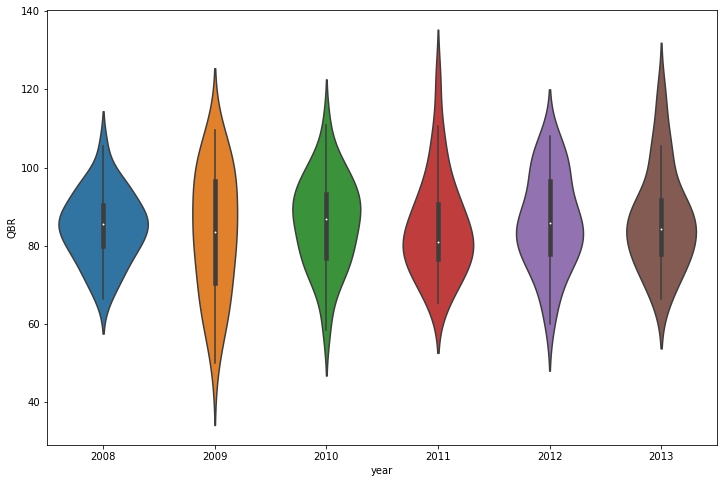

In [753]:
# define plot size and make violin plots to show an approximately normal distribution.
plt.subplots(figsize = (12,8))
seaborn.violinplot(x=table["year"], y=table["QBR"])

<font size="3.5">Good! The data looks to be normally distributed because there is one peak on each violin, the data is not skewed too far to one side, and the mean (the white dot) lies approximately in the center of the distribution. We can proceed with the standardization of the QBR stat. As sports evolve, the game changes, and as the years have gone on, football has become more passing oriented. So, standardization will be done by year.
<br>
<br>For players with an above average QBR, their standardized score will be positive, and those below average will have a negative QBR. In a normal distribution, about two thirds of the data lies within one standard deviation of the mean. Learn more about standardization and what it means <a href="url" target="https://en.wikipedia.org/wiki/Standard_score">here</a>. 
</font>

In [754]:
# begin standardizing
standardized = []

for y in table["year"].unique():
    print
    year = table[(table==y).any(axis=1)]
    
    mean = year["QBR"].mean()
    std = np.std(year["QBR"])
    
    for x in year.itertuples():
        qbr = x[6]
        if std != 0 :
            standard_qbr = (qbr - mean)/std
        else :
            standard_qbr = 0
        standardized.append(standard_qbr)

table["std_qbr"] = standardized

In [755]:
table

,name,completion_rate,td_rate,int_rate,ANY/A,QBR,sack_rate,win_rate,td_int_ratio,year,std_qbr
0,Drew Brees,0.650,2.125000,1.062500,7.55,96.2,0.812500,0.500000,2.000000,2008,1.293268
1,Jay Cutler,0.623,1.562500,1.125000,6.61,86.0,0.687500,0.500000,1.388889,2008,0.131356
2,Kurt Warner,0.671,1.875000,0.875000,7.00,96.9,1.625000,0.562500,2.142857,2008,1.373007
3,Donovan McNabb,0.604,1.437500,0.687500,6.28,86.4,1.437500,0.562500,2.090909,2008,0.176921
4,Peyton Manning,0.668,1.687500,0.750000,6.88,95.0,0.875000,0.750000,2.250000,2008,1.156573
...,...,...,...,...,...,...,...,...,...,...,...
189,Aaron Rodgers,0.666,1.888889,0.666667,8.00,104.9,2.333333,0.666667,2.833333,2013,1.433929
190,Terrelle Pryor,0.574,0.777778,1.222222,4.09,69.1,3.444444,0.333333,0.636364,2013,-1.408426
191,Case Keenum,0.542,1.125000,0.750000,5.40,78.2,2.375000,0.000000,1.500000,2013,-0.685928
192,Kellen Clemens,0.587,0.888889,0.777778,5.25,78.8,2.333333,0.444444,1.142857,2013,-0.638291


<font size="3.5">Now that the data is standardized, we can plot it to see where Joe Flacco lies. We can make one plot for each year to show where he placed relative to other quarterbacks that year.</font>

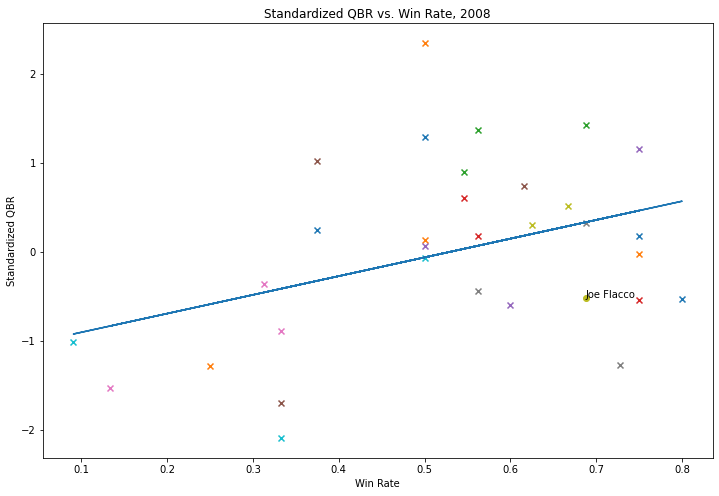

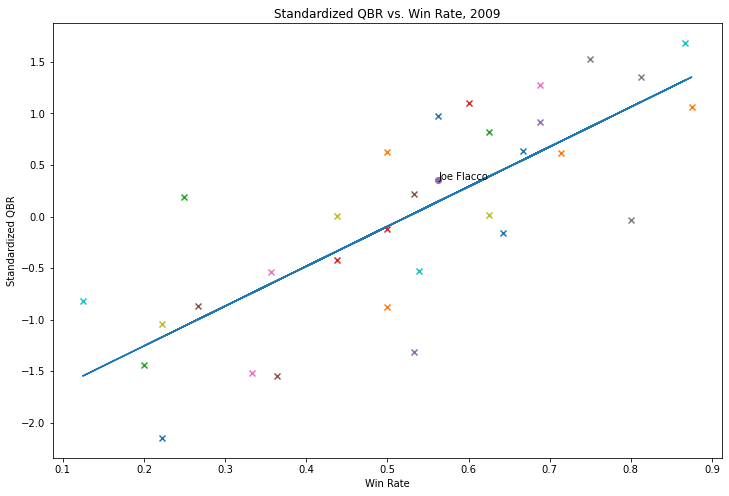

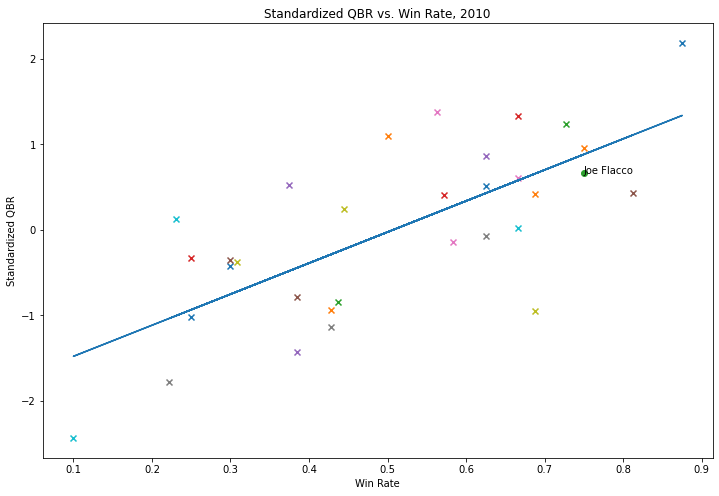

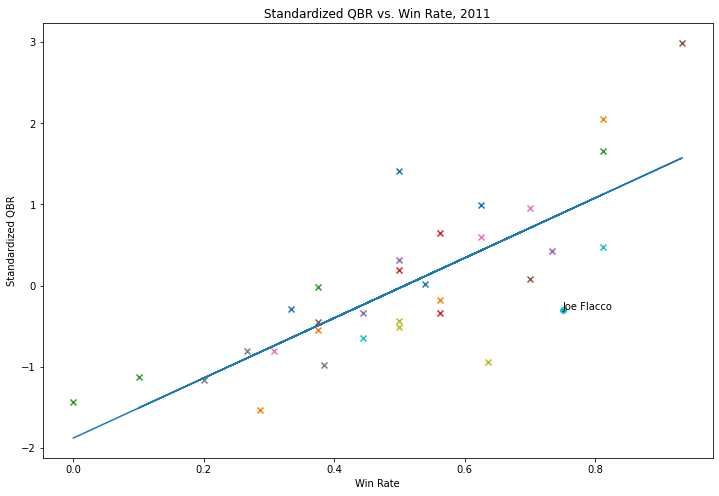

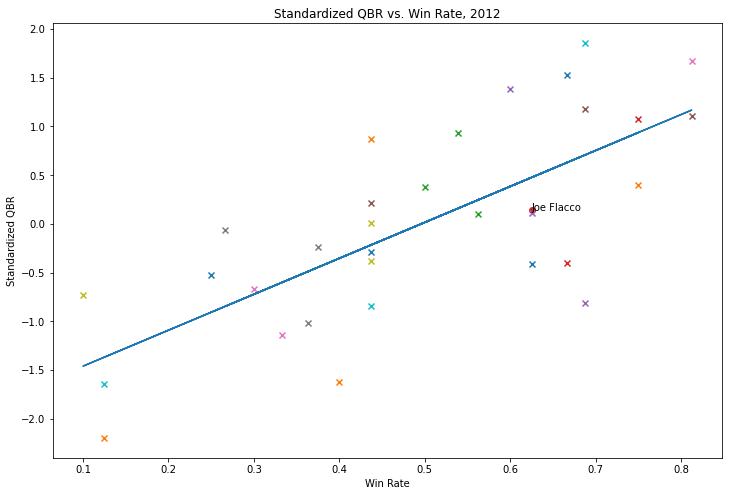

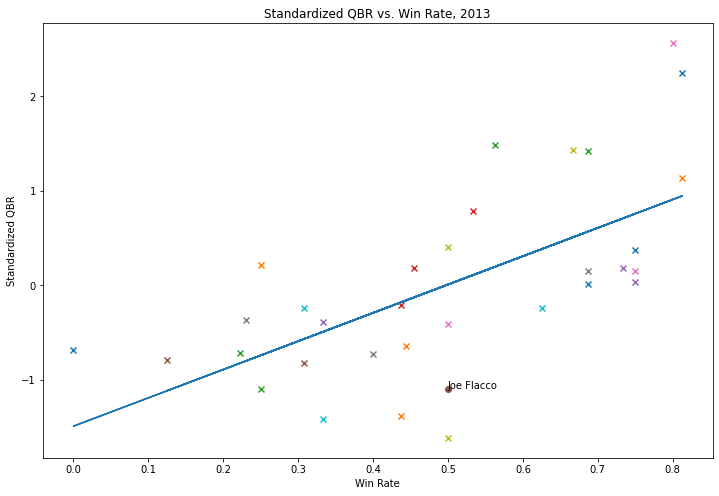

In [756]:
i = 2008
# plot the information by year, and player.
for y in table["year"].unique():
    year = table[(table==y).any(axis=1)]
    plt.subplots(figsize = (12,8))

    for x in year.itertuples():
        name = x[1]
        win_rate = x[8]
        std_score = x[11]

        # plot that specific year of data
        if name == "Joe Flacco":
            plt.scatter(marker = "o", x = win_rate, y = std_score, label=str(i))
            plt.annotate(name , (win_rate, std_score))
        else :
            plt.scatter(marker = "x", x = win_rate, y = std_score, label=str(i)) 
    
    win_rate = np.array(year["win_rate"]).reshape(-1, 1)
    std_qbr = np.array(year["std_qbr"]).reshape(-1, 1)

    # make and plot regression line. 
    reg = LinearRegression().fit(win_rate, std_qbr)
    plt.plot(win_rate, reg.intercept_ + reg.coef_ * win_rate, '-')
    
    x = "Win Rate"
    y = "Standardized QBR"
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(y + " vs. " + x + ", " + str(i))
    plt.show()

    i += 1



# Conclusion
<font size="5">So, is Joe Flacco an Elite Quarterback?</font>
<br>
<br>
<font size="3.5">Unfortunately, Joe Flacco's stats are pretty average or below average in his 2008 through 2013 seasons. However, this does not mean Joe Flacco is not an elite quarterback. As mentioned in the introduction, Joe Flacco built his reputation of eliteness in the playoffs, which this analysis did not cover. His regular season stats are nothing spectacular or out of this world. In order to show Joe Flacco is or is not an elite quarterback, we would need to take a dive into his post-season statistics. If I was working in a group for this project, this is definitely something I would have looked into. 
<br>  
<br>
Purely in terms of Joe Flacco's regular season numerical performances from 2008 through 2013, he is not an elite quarterback. However, the quarterback is never the only player on the field. One shortcoming of this project is that difficulty of opponents is not considered. For example, in the current 2020 season, the AFC North, the division the Ravens are in, have three playoff contenders. Since you play each team in your division twice, being in a tougher division (meaning, your division has teams with high win rates) could certainly affect your on paper performance. When the Ravens play their biggest rival, the Pittsburgh Steelers, the games are always nail-biters until the final whistle blows. Additionally, every teams defense is ranked, and toughness of defense was not considered either. Another thing to consider is the talent of the players on the team as a whole. This is not easy to quantify, but the number of seconds a quarterback has to throw the ball without pressure is a good indicator of how good the offensive line is. More modern statistics could show how many yards apart your receivers get from the nearest defender. This would be an indication that your receivers are able to get open. Even the coaching staff will effect a quarterback's on paper performance, as some play callers are better at designing running plays and worse at designing pass plays. These are possible to take into account, however, is out of the scope of this project.
<br>  
<br>
If you would like to read about Joe Flacco's historic playoff run, you can do so <a href="url" target="https://www.washingtonpost.com/news/fancy-stats/wp/2018/02/05/did-nick-foles-have-the-best-qb-postseason-ever-nope-that-belongs-to-joe-flacco/">here</a>. After reaching the Super Bowl, Bleacher Report, a popular sports site, wrote an <a href="url" target="https://bleacherreport.com/articles/1494677-revisiting-the-argument-that-ravens-qb-joe-flacco-is-elite">article</a> on why he should be considered an elite quarterback.
    
<br>
<br>
Thank you for your time to read my analysis of Joe Flacco as an elite quarterback, and as a life long Raven's fan, I hope you had as much entertainment reading this as I did writing it.
</font>